<a href="https://colab.research.google.com/github/obiedeh/telecom-churn-ml-with-agents/blob/main/telecom_churn_ml_agents.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from tabulate import tabulate
import io
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency, ttest_ind, mannwhitneyu
import plotly.express as px # Import plotly.express
import plotly.graph_objects as go
from plotly.subplots import make_subplots
#----------------------------------------------------------------#

import statsmodels.api as sm
import joblib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, roc_curve, precision_recall_curve,
    confusion_matrix, classification_report, average_precision_score
)
pd.set_option("display.max_columns", None)
#----------------------------------------------------------------#

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error, roc_auc_score, RocCurveDisplay

from pylab import rcParams
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor


In [ ]:
# =========================
# 1. Data Quality Checks
# =========================



# Load data from local directly into dataframe variable
df = pd.read_csv('/content/train.csv')

print("\n--- Initial Inspection --- ")
print(df.head())

# Print first 5 rows
#print("\n=== First 5 Rows ===")
#print(tabulate(df.head(), headers='keys', tablefmt='grid'))

# Print last 5 rows
#print("\n=== Last 5 Rows ===")
#print(tabulate(df.tail(), headers='keys', tablefmt='grid'))

print("\nInfo:\n")
df.info()
print("\nShape:", df.shape)
print("\nDescription:\n", df.describe())

# Display summary statistics using tabulate
#print("\n=== SUMMARY STATISTICS (df.describe()) ===")
#print(tabulate(df.describe(), headers='keys', tablefmt='grid', floatfmt=".4f"))

# Encode churn as binary
df["churn_binary"] = df["churn"].map({"no": 0, "yes": 1})

print("\n--- Data Quality Checks ---\n")
print(df.info())
print("\nMissing values:\n", df.isnull().sum())
print("\nDuplicate rows:", df.duplicated().sum())
print()


--- Initial Inspection --- 
  state  account_length      area_code international_plan voice_mail_plan  \
0    OH             107  area_code_415                 no             yes   
1    NJ             137  area_code_415                 no              no   
2    OH              84  area_code_408                yes              no   
3    OK              75  area_code_415                yes              no   
4    MA             121  area_code_510                 no             yes   

   number_vmail_messages  total_day_minutes  total_day_calls  \
0                     26              161.6              123   
1                      0              243.4              114   
2                      0              299.4               71   
3                      0              166.7              113   
4                     24              218.2               88   

   total_day_charge  total_eve_minutes  total_eve_calls  total_eve_charge  \
0             27.47              195.5        


--- Churn Distribution ---

churn
no     85.929412
yes    14.070588
Name: proportion, dtype: float64



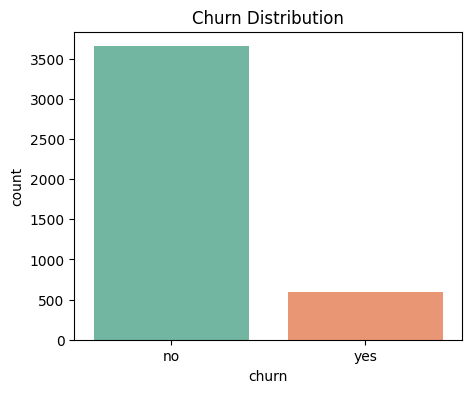

In [ ]:
# =========================
# 3. Target Variable Analysis
# =========================

# Load data from local directly into dataframe variable
df = pd.read_csv('/content/train.csv')

# Encode churn as binary
df["churn_binary"] = df["churn"].map({"no": 0, "yes": 1})

print("\n--- Churn Distribution ---\n")
print(df["churn"].value_counts(normalize=True)*100)
print()

# Plot churn distribution
plt.figure(figsize=(5,4))
sns.countplot(data=df, x="churn", hue="churn", palette="Set2", legend=False)
plt.title("Churn Distribution")
plt.show()
print()  # adds whitespace in output



--- Numeric Summary ---

       account_length  number_vmail_messages  total_day_minutes  \
count     4250.000000            4250.000000        4250.000000   
mean       100.236235               7.631765         180.259600   
std         39.698401              13.439882          54.012373   
min          1.000000               0.000000           0.000000   
25%         73.000000               0.000000         143.325000   
50%        100.000000               0.000000         180.450000   
75%        127.000000              16.000000         216.200000   
max        243.000000              52.000000         351.500000   

       total_day_calls  total_day_charge  total_eve_minutes  total_eve_calls  \
count      4250.000000       4250.000000        4250.000000      4250.000000   
mean         99.907294         30.644682         200.173906       100.176471   
std          19.850817          9.182096          50.249518        19.908591   
min           0.000000          0.000000          

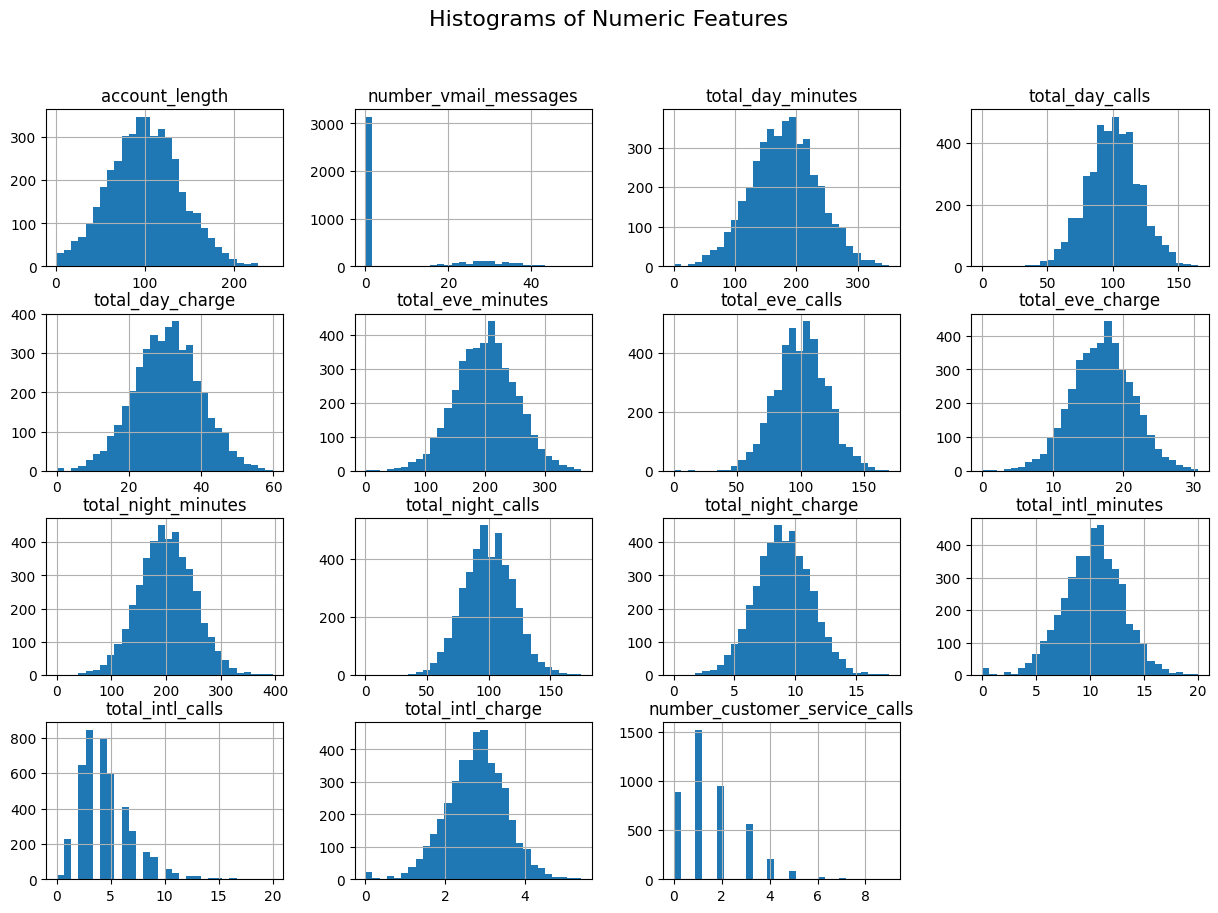

In [ ]:

# =========================
# 4. Univariate Analysis
# =========================

# Load data into dataframe variable
df = pd.read_csv('/content/train.csv')

# Encode churn as binary
df["churn_binary"] = df["churn"].map({"no": 0, "yes": 1})

print("\n--- Numeric Summary ---\n")
print(df.describe())
print()

# Histograms for numeric features
num_cols = df.select_dtypes(include=[np.number]).columns.drop("churn_binary")
df[num_cols].hist(figsize=(15,10), bins=30)
plt.suptitle("Histograms of Numeric Features", fontsize=16)
plt.show()
print("\n\n")  # adds whitespace in output

#-------------------------------------------------------------------------------



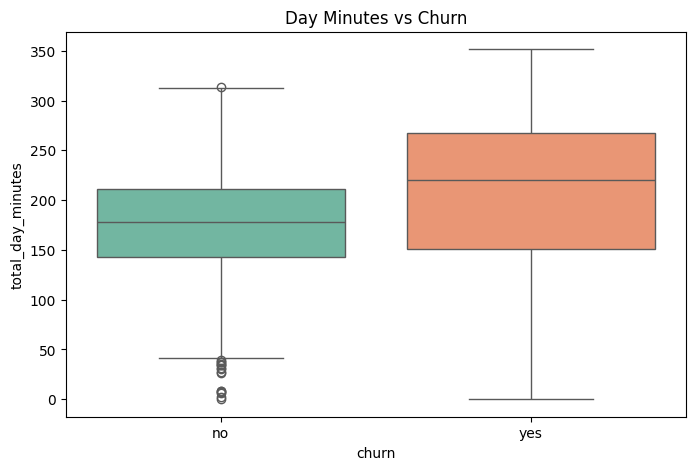

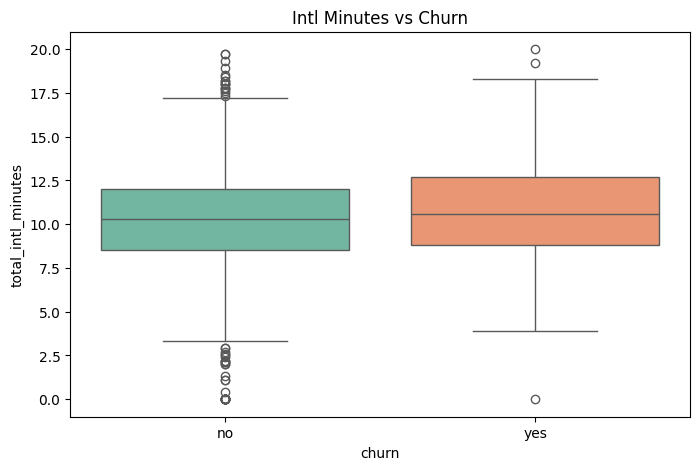

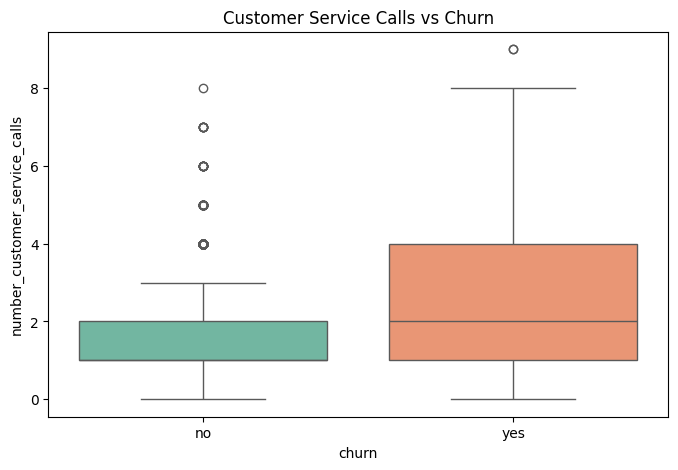

In [ ]:

# =========================
# 5. Bivariate Analysis
# =========================

# Load data data into datafram variable
df = pd.read_csv('/content/train.csv')

# Encode churn as binary
df["churn_binary"] = df["churn"].map({"no": 0, "yes": 1})

# Boxplot: Day Minutes vs Churn
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="churn", y="total_day_minutes",
            hue="churn", palette="Set2", legend=False)
plt.title("Day Minutes vs Churn")
plt.show()
print()

# Boxplot: Intl Minutes vs Churn
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="churn", y="total_intl_minutes",
            hue="churn", palette="Set2", legend=False)
plt.title("Intl Minutes vs Churn")
plt.show()
print()

# Boxplot: Customer Service Calls vs Churn
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="churn", y="number_customer_service_calls",
            hue="churn", palette="Set2", legend=False)
plt.title("Customer Service Calls vs Churn")
plt.show()
print()



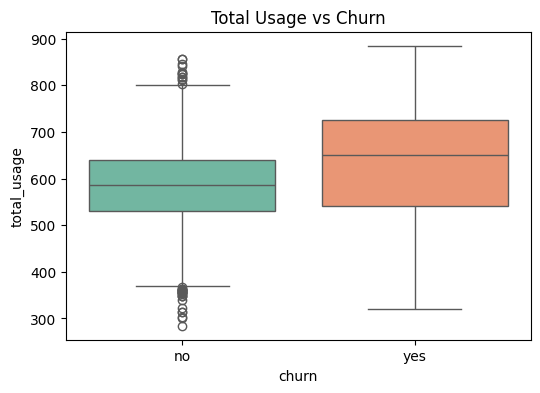

In [ ]:
# =========================
# 6. Derived Features
# =========================

# Load data into dataframe variable
df = pd.read_csv('/content/train.csv')

# Encode churn as binary
df["churn_binary"] = df["churn"].map({"no": 0, "yes": 1})

# Derived feature: total usage across all time periods
df["total_usage"] = (
    df["total_day_minutes"]
    + df["total_eve_minutes"]
    + df["total_night_minutes"]
    + df["total_intl_minutes"]
)

print()
# Boxplot: Total Usage vs Churn
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x="churn", y="total_usage",
            hue="churn", palette="Set2", legend=False)
plt.title("Total Usage vs Churn")
plt.show()
print()


In [ ]:
# ================================================================
# Churn Rate vs. Customer Service Call Maps vs. Total Day Minutes
# ================================================================

# Load data into dataframe variable df
df = pd.read_csv('/content/train.csv')

# Encode churn as binary
df["churn_binary"] = df["churn"].map({"no": 0, "yes": 1})

# Geopandas doesn't have state-level geometry by default, so let's use plotly or census shapefile instead
# Alternative: use Plotly built-in map with state abbreviations Customer Service Calls map

# Calculate average customer service calls by state

# Numeric churn
df["churn_binary"] = df["churn"].map({"yes": 1, "no": 0})

# Aggregates
calls_by_state = df.groupby("state")["number_customer_service_calls"].sum().reset_index()
day_minutes = df.groupby("state")["total_day_minutes"].sum().reset_index()
churn_by_state = df.groupby("state")["churn_binary"].sum().reset_index()

# Simple mono-red colorscale: white (low) -> dark red (high)
mono_red = [[0.0, "#ffffff"], [1.0, "#8B0000"]]

# --- First map: Avg Calls ---
fig_calls = px.choropleth(
    calls_by_state,
    locations="state", locationmode="USA-states",
    color="number_customer_service_calls",
    scope="usa",
    color_continuous_scale=mono_red,
    title="Customer Service Calls by State"
)
fig_calls.update_layout(
    coloraxis_colorbar=dict(title="Calls (per Customer)"),
    title_x=0.5
)
fig_calls.show()

print()

# --- 2nd map: Total Day Minutes/Usage ---
fig_day_minutes = px.choropleth(
    day_minutes,
    locations="state", locationmode="USA-states",
    color="total_day_minutes",
    scope="usa",
    color_continuous_scale=mono_red,
    title="Total Day Minutes by State"
)
fig_day_minutes.update_layout(
    coloraxis_colorbar=dict(title="Total Day Minutes"),
    title_x=0.5
)
fig_day_minutes.show()
print()

# --- third map: Churn Rate ---
fig_churn = px.choropleth(
    churn_by_state,
    locations="state", locationmode="USA-states",
    color="churn_binary",
    scope="usa",
    color_continuous_scale=mono_red,
    title="Churn Rate by State"
)
fig_churn.update_layout(
    coloraxis_colorbar=dict(title="Churn Rate (Proportion)"),
    title_x=0.5
)
fig_churn.show()
print()

In [ ]:

# =========================
# 7. Statistical Tests
# =========================

# Load data into dataframe variabe df
df = pd.read_csv('/content/train.csv')

# Encode churn as binary
df["churn_binary"] = df["churn"].map({"no": 0, "yes": 1})

print("\n--- Statistical Tests ---")

# Chi-square: International Plan vs Churn
ct = pd.crosstab(df["international_plan"], df["churn"])
chi2, p, dof, expected = chi2_contingency(ct)
print(f"Chi-square (International Plan vs Churn): chi2={chi2:.2f}, p={p:.4f}")

# Chi-square: Voice Mail Plan vs Churn
ct = pd.crosstab(df["voice_mail_plan"], df["churn"])
chi2, p, dof, expected = chi2_contingency(ct)
print(f"Chi-square (Voice Mail Plan vs Churn): chi2={chi2:.2f}, p={p:.4f}")

# t-test: Day Minutes by churn
churn_yes = df.loc[df["churn"]=="yes", "total_day_minutes"]
churn_no = df.loc[df["churn"]=="no", "total_day_minutes"]
tstat, p = ttest_ind(churn_yes, churn_no)
print(f"T-test (Day Minutes vs Churn): t={tstat:.2f}, p={p:.4f}")

# Mann-Whitney U test: Customer Service Calls
u, p = mannwhitneyu(
    df.loc[df["churn"]=="yes", "number_customer_service_calls"],
    df.loc[df["churn"]=="no", "number_customer_service_calls"]
)
print(f"Mann-Whitney U (Service Calls vs Churn): U={u:.2f}, p={p:.4f}")
print()







--- Statistical Tests ---
Chi-square (International Plan vs Churn): chi2=282.65, p=0.0000
Chi-square (Voice Mail Plan vs Churn): chi2=55.11, p=0.0000
T-test (Day Minutes vs Churn): t=14.37, p=0.0000
Mann-Whitney U (Service Calls vs Churn): U=1357359.00, p=0.0000



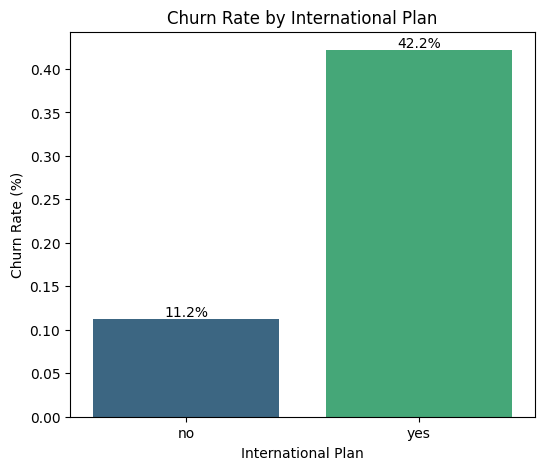

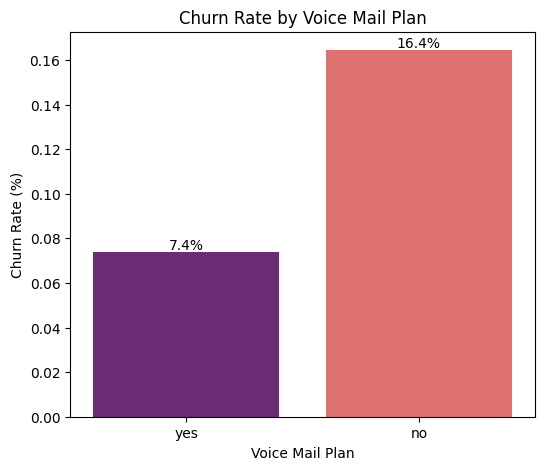

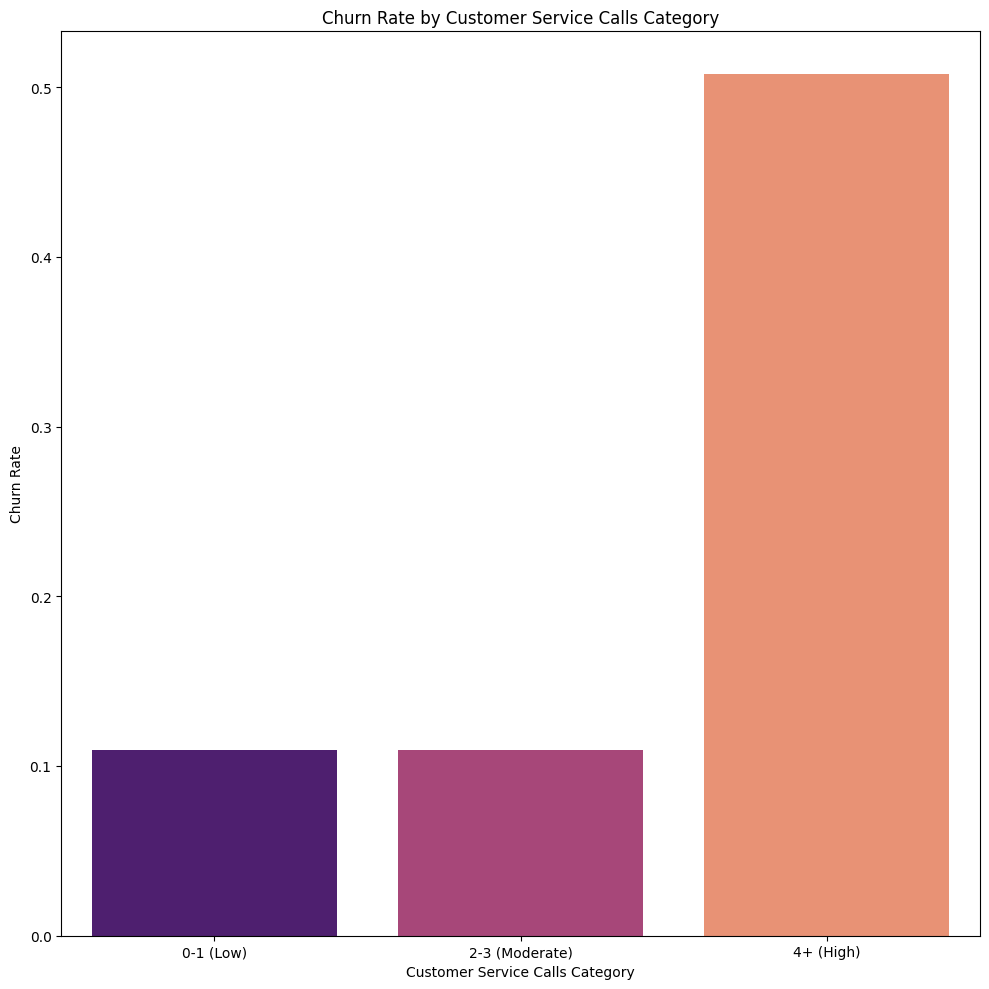

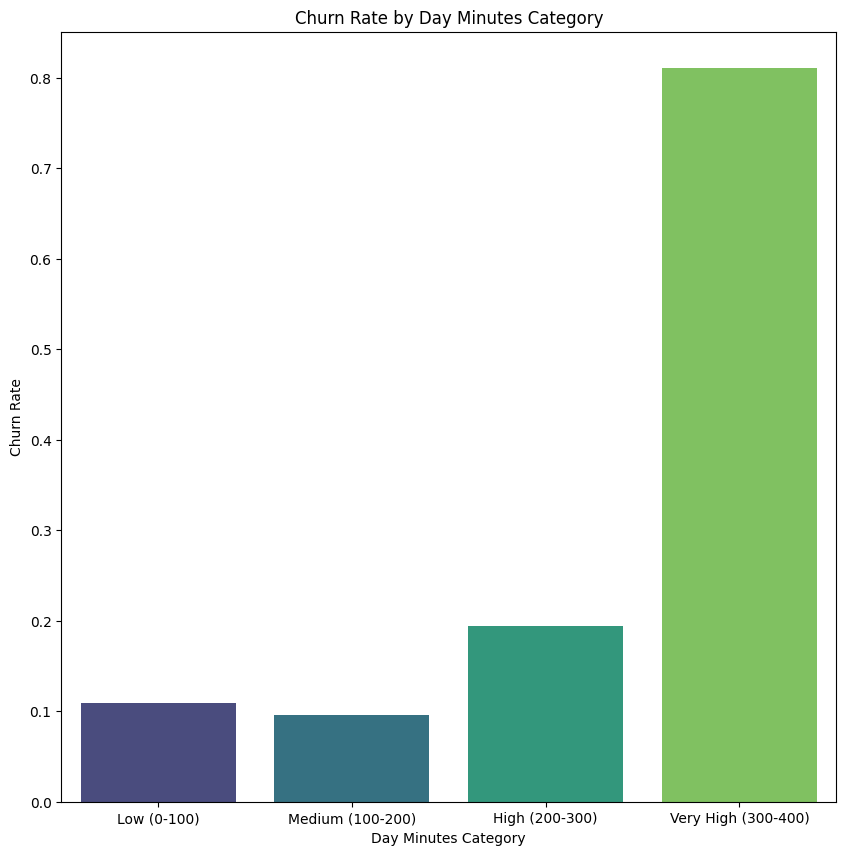

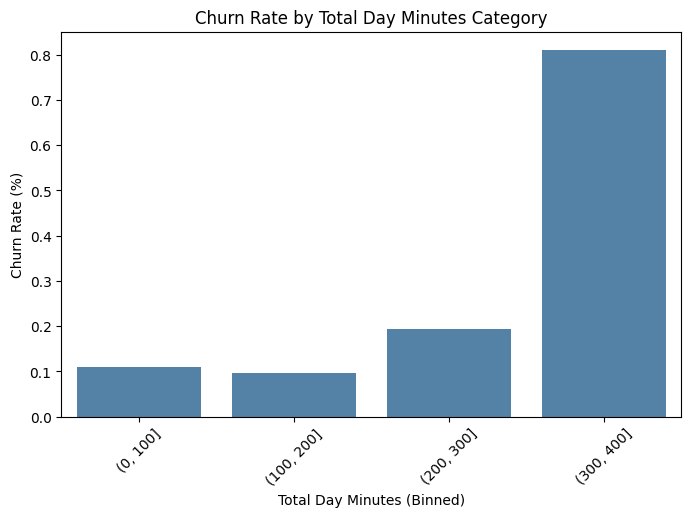

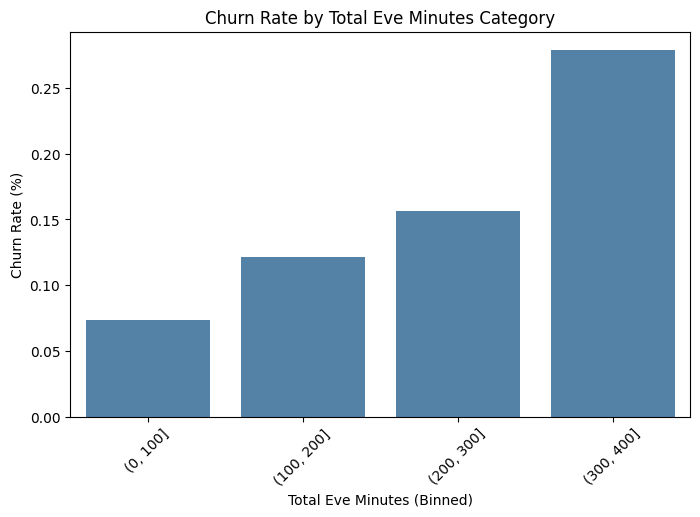

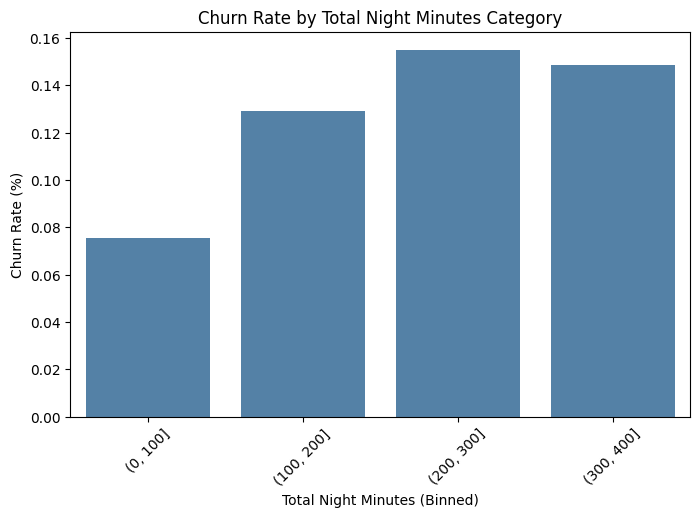

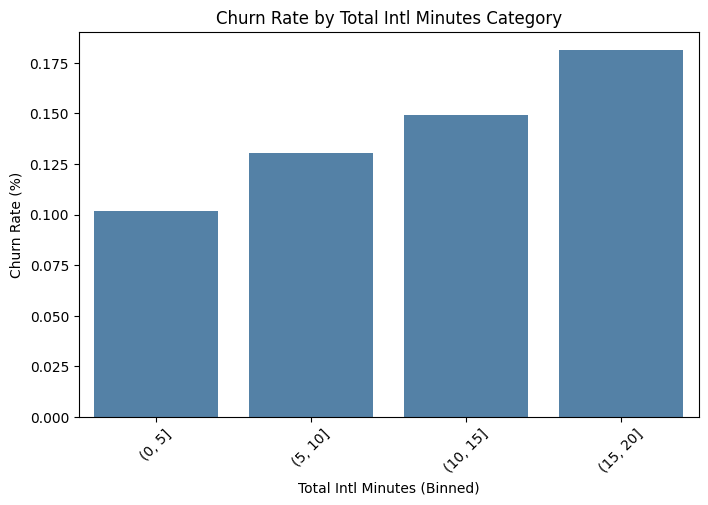

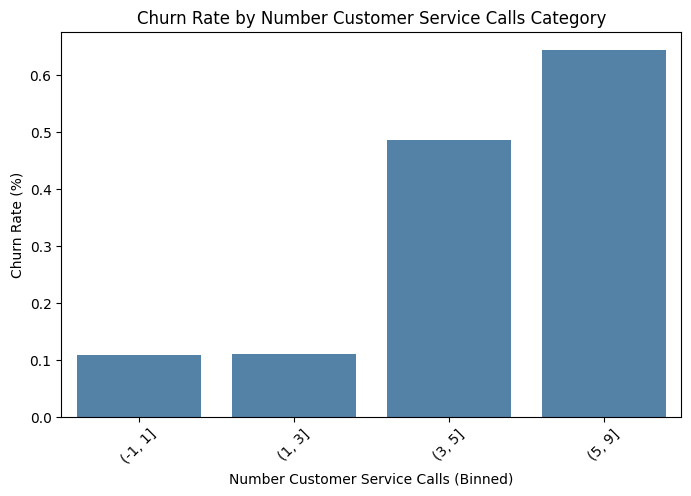

In [ ]:

# =========================
# 8. Churn Rate Histograms (Numeric Features)
# =========================

# Load data in dataframe variabe df
df = pd.read_csv('/content/train.csv')

# Add a binary churn column to the DataFrame - moved this up
df["churn_binary"] = df["churn"].map({"no": 0, "yes": 1})

# ---- Plot 1: International Plan ----
plt.figure(figsize=(6,5))
ax1 = sns.barplot(
    data=df, x="international_plan", y="churn_binary",
    hue="international_plan", palette="viridis", legend=False, errorbar=None
)
ax1.set_title("Churn Rate by International Plan")
ax1.set_ylabel("Churn Rate (%)")
ax1.set_xlabel("International Plan")

# Add percentages above bars
for container in ax1.containers:
    ax1.bar_label(container, fmt="%.1f%%", labels=[f"{val*100:.1f}%" for val in container.datavalues])
plt.show()
print()  # adds whitespace in output

# ---- Plot 2: Voice Mail Plan ----
plt.figure(figsize=(6,5))
ax2 = sns.barplot(
    data=df, x="voice_mail_plan", y="churn_binary",
    hue="voice_mail_plan", palette="magma", legend=False, errorbar=None
)
ax2.set_title("Churn Rate by Voice Mail Plan")
ax2.set_ylabel("Churn Rate (%)")
ax2.set_xlabel("Voice Mail Plan")

# Add percentages above bars
for container in ax2.containers:
    ax2.bar_label(container, fmt="%.1f%%", labels=[f"{val*100:.1f}%" for val in container.datavalues])

plt.show()
print()  # adds whitespace in output


# Bin customer service calls
df["service_calls_bin"] = pd.cut(
    df["number_customer_service_calls"],
    bins=[-1, 1, 3, 9],
    labels=["0-1 (Low)", "2-3 (Moderate)", "4+ (High)"]
)

# Churn rate by calls bin
churn_by_calls = df.groupby("service_calls_bin", observed=False)["churn_binary"].mean().reset_index()

# Plot
sns.barplot(
    data=churn_by_calls, x="service_calls_bin", y="churn_binary",
    hue="service_calls_bin", palette="magma", legend=False
)
plt.title("Churn Rate by Customer Service Calls Category")
plt.ylabel("Churn Rate")
plt.xlabel("Customer Service Calls Category")
plt.tight_layout()
plt.show()
print()  # adds whitespace in output

# Create bins for day minutes
df["day_minutes_bin"] = pd.cut(
    df["total_day_minutes"],
    bins=[0, 100, 200, 300, 400],
    labels=["Low (0-100)", "Medium (100-200)", "High (200-300)", "Very High (300-400)"]
)
# Calculate churn rate by bin
churn_by_bin = df.groupby("day_minutes_bin", observed=False)["churn_binary"].mean().reset_index()

# Plot
sns.barplot(
    data=churn_by_bin, x="day_minutes_bin", y="churn_binary",
    hue="day_minutes_bin", palette="viridis", legend=False
)
plt.title("Churn Rate by Day Minutes Category")
plt.ylabel("Churn Rate")
plt.xlabel("Day Minutes Category")
plt.show()
print()

# ---------- Additional Histogram Plots ------------

# Encode churn as binary
df["churn_binary"] = df["churn"].map({"no": 0, "yes": 1})

# Pick key numeric features for churn histograms
features = ["total_day_minutes", "total_eve_minutes", "total_night_minutes",
            "total_intl_minutes", "number_customer_service_calls"]

# Define binning strategy
binning = {
    "total_day_minutes": [0, 100, 200, 300, 400],
    "total_eve_minutes": [0, 100, 200, 300, 400],
    "total_night_minutes": [0, 100, 200, 300, 400],
    "total_intl_minutes": [0, 5, 10, 15, 20],
    "number_customer_service_calls": [-1, 1, 3, 5, 9]
}

# Plot churn rate histograms for each feature
for feature in features:
    df[feature+"_bin"] = pd.cut(df[feature], bins=binning[feature])

    churn_rate_by_bin = df.groupby(feature+"_bin", observed=False)["churn_binary"].mean().reset_index()

    plt.figure(figsize=(8,5))
    sns.barplot(data=churn_rate_by_bin, x=feature+"_bin", y="churn_binary", color="steelblue")
    plt.xticks(rotation=45)
    plt.ylabel("Churn Rate (%)")
    plt.xlabel(feature.replace("_"," ").title() + " (Binned)")
    plt.title(f"Churn Rate by {feature.replace('_',' ').title()} Category")
    plt.show()
    print()


In [ ]:
# Team 6 - Nicholson Aforque - AAI - 500

In [ ]:
# ML - MODELS

In [ ]:
df = pd.read_csv("/content/train.csv" )

# Map target to binary
if "churn" not in df.columns:
    raise ValueError("Expected a 'churn' column in the training CSV.")
df["churn_binary"] = df["churn"].map({"yes": 1, "no": 0})

X = df.drop(columns=["churn", "churn_binary"])
y = df["churn_binary"]

display(df.head())
print("Shape:", df.shape)
print("Target positive rate:", y.mean().round(4))


,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,churn_binary
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no,0
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no,0
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no,0
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no,0
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no,0


Shape: (4250, 21)
Target positive rate: 0.1407


In [ ]:
#train split 80/20
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

cat_cols = X.select_dtypes(include=["object"]).columns.tolist()
num_cols = X.select_dtypes(exclude=["object"]).columns.tolist()

print("Categorical:", cat_cols)
print("Numerical:", num_cols)

Categorical: ['state', 'area_code', 'international_plan', 'voice_mail_plan']
Numerical: ['account_length', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge', 'total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 'total_night_calls', 'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge', 'number_customer_service_calls']


In [ ]:
#preprocessing
numeric_transformer = Pipeline([("scaler", StandardScaler())])
categorical_transformer = Pipeline([("ohe", OneHotEncoder(handle_unknown="ignore"))])

preprocess = ColumnTransformer(
    [("num", numeric_transformer, num_cols),
     ("cat", categorical_transformer, cat_cols)]
)


In [ ]:
#training
pipe_lr = Pipeline([
    ("preprocess", preprocess),
    ("clf", LogisticRegression(max_iter=2000, class_weight="balanced"))
])

pipe_rf = Pipeline([
    ("preprocess", preprocess),
    ("clf", RandomForestClassifier(
        n_estimators=300, class_weight="balanced", random_state=42
    ))
])

pipe_lr.fit(X_train, y_train)
pipe_rf.fit(X_train, y_train)
print("Models trained.")


Models trained.


In [ ]:
#generate best model
proba_lr = pipe_lr.predict_proba(X_test)[:, 1]
proba_rf = pipe_rf.predict_proba(X_test)[:, 1]

auc_lr = roc_auc_score(y_test, proba_lr)
auc_rf = roc_auc_score(y_test, proba_rf)

if auc_rf >= auc_lr:
    best_name, best_model, y_proba = "RandomForest", pipe_rf, proba_rf
else:
    best_name, best_model, y_proba = "LogisticRegression", pipe_lr, proba_lr

print(f"Best model: {best_name} | AUC_LR={auc_lr:.3f} | AUC_RF={auc_rf:.3f}")


Best model: RandomForest | AUC_LR=0.793 | AUC_RF=0.903


In [ ]:
#evaluation 0.5
y_pred = (y_proba >= 0.5).astype(int)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, zero_division=0)
rec = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)
roc_auc = roc_auc_score(y_test, y_proba)
avg_prec = average_precision_score(y_test, y_proba)

print(f"Accuracy={acc:.3f}, Precision={prec:.3f}, Recall={rec:.3f}, "
      f"F1={f1:.3f}, ROC-AUC={roc_auc:.3f}, PR-AUC(AP)={avg_prec:.3f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy=0.944, Precision=0.986, Recall=0.608, F1=0.753, ROC-AUC=0.903, PR-AUC(AP)=0.840

Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       730
           1       0.99      0.61      0.75       120

    accuracy                           0.94       850
   macro avg       0.96      0.80      0.86       850
weighted avg       0.95      0.94      0.94       850


Confusion Matrix:
 [[729   1]
 [ 47  73]]


In [ ]:
#evaluation 0.5
y_pred = (y_proba >= 0.5).astype(int)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, zero_division=0)
rec = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)
roc_auc = roc_auc_score(y_test, y_proba)
avg_prec = average_precision_score(y_test, y_proba)

print(f"Accuracy={acc:.3f}, Precision={prec:.3f}, Recall={rec:.3f}, "
      f"F1={f1:.3f}, ROC-AUC={roc_auc:.3f}, PR-AUC(AP)={avg_prec:.3f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy=0.944, Precision=0.986, Recall=0.608, F1=0.753, ROC-AUC=0.903, PR-AUC(AP)=0.840

Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       730
           1       0.99      0.61      0.75       120

    accuracy                           0.94       850
   macro avg       0.96      0.80      0.86       850
weighted avg       0.95      0.94      0.94       850


Confusion Matrix:
 [[729   1]
 [ 47  73]]


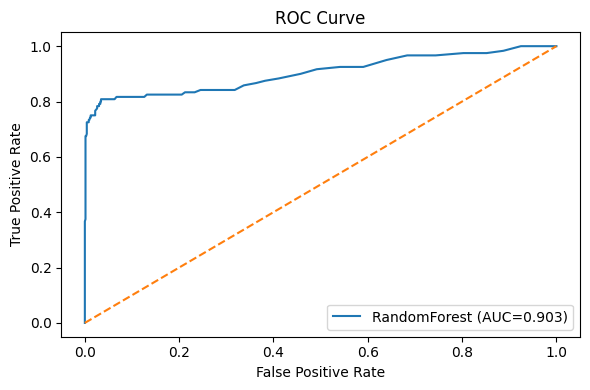

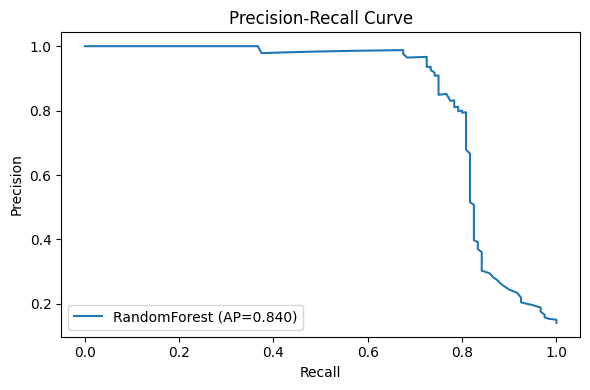

In [ ]:
#generate graphs
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"{best_name} (AUC={roc_auc:.3f})")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
plt.title("ROC Curve"); plt.legend(loc="lower right"); plt.tight_layout()
plt.show()

pr_prec, pr_rec, _ = precision_recall_curve(y_test, y_proba)
plt.figure(figsize=(6, 4))
plt.plot(pr_rec, pr_prec, label=f"{best_name} (AP={avg_prec:.3f})")
plt.xlabel("Recall"); plt.ylabel("Precision")
plt.title("Precision-Recall Curve"); plt.legend(loc="lower left"); plt.tight_layout()
plt.show()


In [ ]:
#save model
MODEL_PATH = "churn_model_pipeline.joblib"
import joblib
joblib.dump(best_model, MODEL_PATH)
print(f"Model saved -> {MODEL_PATH}")

Model saved -> churn_model_pipeline.joblib


In [ ]:
#try model on test.csv
NEW_DATA_CSV = "/content/test.csv"
new_data = pd.read_csv(NEW_DATA_CSV)
proba_new = best_model.predict_proba(new_data)[:, 1]
pred_new = (proba_new >= 0.5).astype(int)
out = new_data.copy()
out["churn_proba"] = proba_new
out["churn_pred"] = pred_new
out.to_csv("predictions.csv", index=False)
print("Predictions saved to predictions.csv")

Predictions saved to predictions.csv


In [ ]:
#fine tune
thresholds = np.linspace(0.1, 0.9, 17)
best_thr, best_f1 = 0.5, -1.0
for thr in thresholds:
    yp = (y_proba >= thr).astype(int)
    f1_thr = f1_score(y_test, yp, zero_division=0)
    if f1_thr > best_f1:
        best_f1, best_thr = f1_thr, thr
print(f"Best F1={best_f1:.3f} at threshold={best_thr:.2f}")


Best F1=0.825 at threshold=0.40


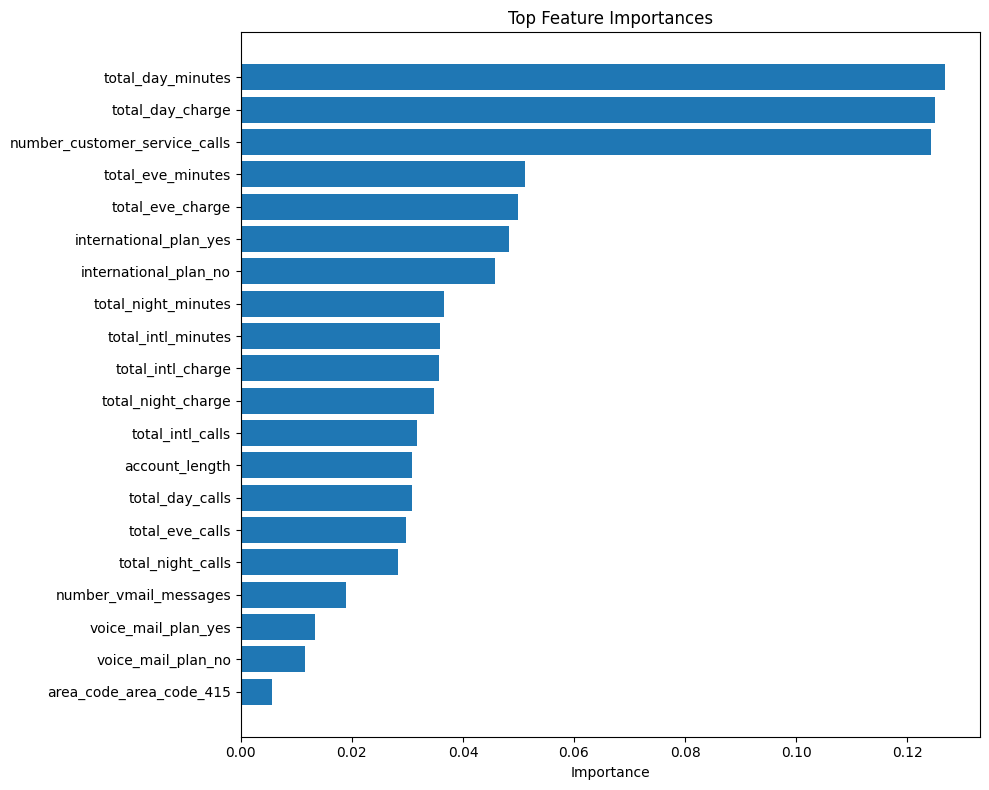

,feature,importance
0,total_day_minutes,0.126784
1,total_day_charge,0.124981
2,number_customer_service_calls,0.124281
3,total_eve_minutes,0.051120
4,total_eve_charge,0.049980
5,international_plan_yes,0.048248
6,international_plan_no,0.045823
7,total_night_minutes,0.036505
8,total_intl_minutes,0.035912
9,total_intl_charge,0.035728


In [ ]:
#generate importance graph
try:
    pipe = best_model
except NameError:
    pipe = joblib.load("churn_model_pipeline.joblib")

# post-preprocessing feature names
pre = pipe.named_steps["preprocess"]
num_cols, cat_cols = [], []
for name, transformer, cols in pre.transformers_:
    if name == "num":
        num_cols = list(cols)
    elif name == "cat":
        cat_cols = list(cols)

ohe = pre.named_transformers_["cat"].named_steps["ohe"]
try:
    cat_feature_names = ohe.get_feature_names_out(cat_cols).tolist()
except Exception:
    cat_feature_names = list(ohe.get_feature_names(cat_cols))

feature_names = list(num_cols) + cat_feature_names

# importances
clf = pipe.named_steps["clf"]
metric_name = "importance"

if isinstance(clf, RandomForestClassifier):
    values = clf.feature_importances_
elif isinstance(clf, LogisticRegression):
    values = np.abs(clf.coef_.ravel())  # magnitude as importance
    metric_name = "abs_coef"
else:
    # Fallback: permutation importance (uses X_test/y_test from earlier cells)
    result = permutation_importance(pipe, X_test, y_test, n_repeats=5, random_state=42, n_jobs=1)
    values = result.importances_mean
    metric_name = "perm_importance"

feat_df = pd.DataFrame({"feature": feature_names, metric_name: values}).sort_values(metric_name, ascending=False).reset_index(drop=True)

# Top 20
topn = 20
top_df = feat_df.head(topn).iloc[::-1]  # reverse for barh
plt.figure(figsize=(10, 8))
plt.barh(top_df["feature"], top_df[metric_name])
plt.xlabel("Importance")
plt.title("Top Feature Importances")
plt.tight_layout()
plt.show()

# Save figure
plt.figure(figsize=(10, 8))
plt.barh(top_df["feature"], top_df[metric_name])
plt.xlabel("Importance")
plt.title("Top Feature Importances")
plt.tight_layout()
plt.savefig("feature_importances_top20.png", dpi=180)
plt.close()

# Preview
feat_df.head(50)


===== Logistic Regression =====
ROC-AUC: 0.735 | PR-AUC(AP): 0.326
              precision    recall  f1-score   support

           0      0.864     0.986     0.921       913
           1      0.381     0.053     0.094       150

    accuracy                          0.854      1063
   macro avg      0.622     0.520     0.507      1063
weighted avg      0.796     0.854     0.804      1063



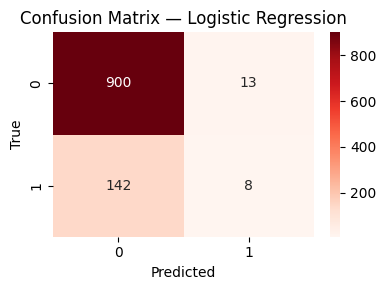

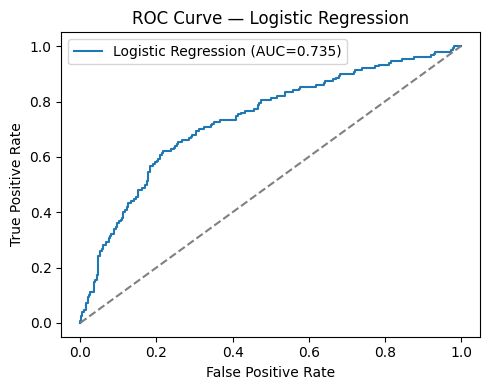

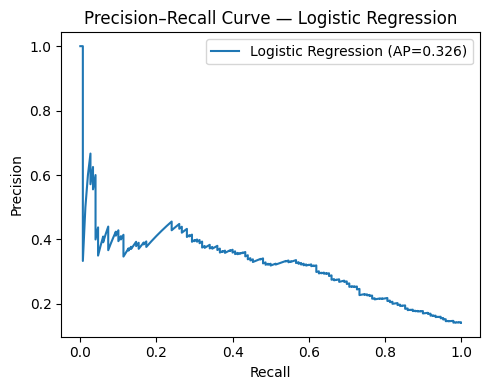


===== Decision Tree =====
ROC-AUC: 0.774 | PR-AUC(AP): 0.499
              precision    recall  f1-score   support

           0      0.904     0.968     0.935       913
           1      0.659     0.373     0.477       150

    accuracy                          0.884      1063
   macro avg      0.781     0.671     0.706      1063
weighted avg      0.869     0.884     0.870      1063



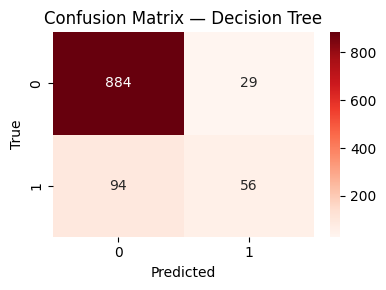

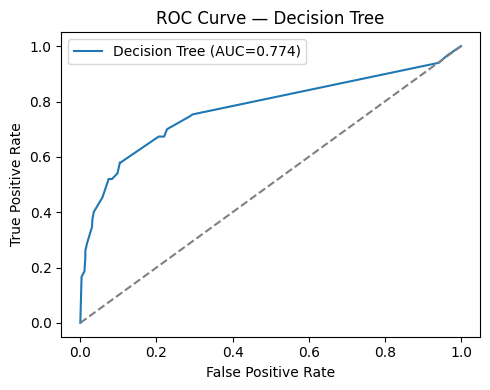

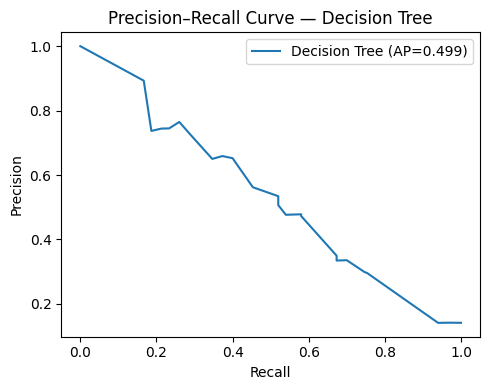


===== Random Forest =====
ROC-AUC: 0.804 | PR-AUC(AP): 0.567
              precision    recall  f1-score   support

           0      0.900     0.981     0.939       913
           1      0.746     0.333     0.461       150

    accuracy                          0.890      1063
   macro avg      0.823     0.657     0.700      1063
weighted avg      0.878     0.890     0.871      1063



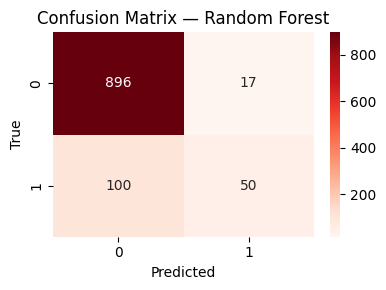

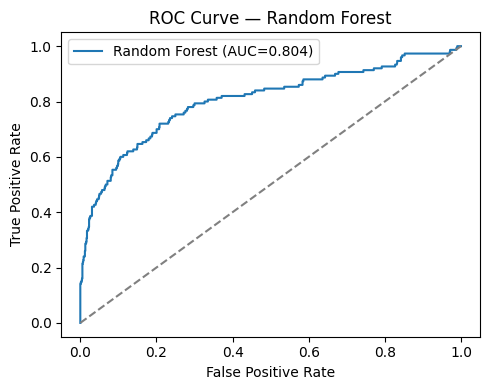

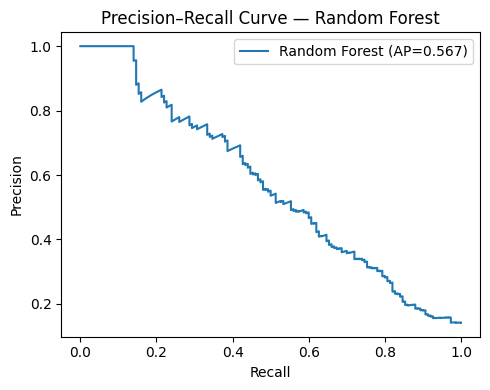

                                 OLS Regression Results                                
Dep. Variable:                  churn   R-squared (uncentered):                   0.206
Model:                            OLS   Adj. R-squared (uncentered):              0.206
Method:                 Least Squares   F-statistic:                              276.1
Date:                Mon, 20 Oct 2025   Prob (F-statistic):                   3.10e-211
Time:                        20:54:32   Log-Likelihood:                         -1371.9
No. Observations:                4250   AIC:                                      2752.
Df Residuals:                    4246   BIC:                                      2777.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                                    coef    std err          t      P>|t|      [0.025      0.975]
----------------------

In [ ]:
#Plot Generation
df = pd.read_csv("/content/train.csv")


# Data cleaning, string to int
df["churn"] = df["churn"].str.strip().str.lower().map({"yes": 1, "no": 0})

y = df["churn"].astype(int)
X = df.drop(columns=["churn"])

# Restrict to most impactful features
selected_features = [
    "number_customer_service_calls",
    "total_intl_minutes",
    "total_day_minutes",
    "total_day_charge"
]
X = X[selected_features]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


models = {
    "Logistic Regression": LogisticRegression(max_iter=500, random_state=42),
    "Decision Tree": DecisionTreeClassifier(max_depth=6, random_state=42),
    "Random Forest": RandomForestClassifier(
        n_estimators=200, max_depth=8, random_state=42
    ),
}


for name, model in models.items():
    print(f"\n===== {name} =====")


    if name == "Logistic Regression":
        model.fit(X_train_scaled, y_train)
        y_probs = model.predict_proba(X_test_scaled)[:, 1]
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_probs = model.predict_proba(X_test)[:, 1]
        y_pred = model.predict(X_test)


    roc_auc = roc_auc_score(y_test, y_probs)
    ap_score = average_precision_score(y_test, y_probs)

    print(f"ROC-AUC: {roc_auc:.3f} | PR-AUC(AP): {ap_score:.3f}")
    print(classification_report(y_test, y_pred, digits=3))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Reds")
    plt.title(f"Confusion Matrix — {name}")
    plt.xlabel("Predicted"); plt.ylabel("True")
    plt.tight_layout()
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    plt.figure(figsize=(5, 4))
    plt.plot(fpr, tpr, label=f"{name} (AUC={roc_auc:.3f})")
    plt.plot([0, 1], [0, 1], "--", color="gray")
    plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve — {name}")
    plt.legend(); plt.tight_layout()
    plt.show()

    # Precision–Recall Curve
    prec, rec, _ = precision_recall_curve(y_test, y_probs)
    plt.figure(figsize=(5, 4))
    plt.plot(rec, prec, label=f"{name} (AP={ap_score:.3f})")
    plt.xlabel("Recall"); plt.ylabel("Precision")
    plt.title(f"Precision–Recall Curve — {name}")
    plt.legend(); plt.tight_layout()
    plt.show()

model = sm.OLS(y, X).fit()

print(model.summary())

In [ ]:
# Team 6 - Jeffrey Smith - AAI - 500

In [ ]:
### Pearson's Correlation Coefficients ###
## Did not provide any hidden data other than proving minute to charge correlation is accurate.

# Load training data
train_df = pd.read_csv('train.csv')


correlation_matrix = train_df[['total_day_minutes', 'total_eve_minutes', 'total_night_minutes',
                               'total_intl_minutes', 'total_day_charge', 'total_eve_charge',
                               'total_night_charge', 'total_intl_charge']].corr()

print(correlation_matrix)
print()

                     total_day_minutes  total_eve_minutes  \
total_day_minutes             1.000000          -0.013248   
total_eve_minutes            -0.013248           1.000000   
total_night_minutes           0.010049          -0.014018   
total_intl_minutes           -0.021369          -0.003509   
total_day_charge              1.000000          -0.013247   
total_eve_charge             -0.013258           1.000000   
total_night_charge            0.010036          -0.014031   
total_intl_charge            -0.021291          -0.003460   

                     total_night_minutes  total_intl_minutes  \
total_day_minutes               0.010049           -0.021369   
total_eve_minutes              -0.014018           -0.003509   
total_night_minutes             1.000000           -0.000113   
total_intl_minutes             -0.000113            1.000000   
total_day_charge                0.010053           -0.021374   
total_eve_charge               -0.014022           -0.003512   
to

In [ ]:
#  K-Nearest Neighbors Models

In [ ]:
#  Accuracy test for K and how my 7 parameter was chosen going forward.

def accuracy(k, X_train, y_train, X_test, y_test):

    # instantiate learning model and fit data
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)


    # predict the response
    pred = knn.predict(X_test)


    # evaluate and return  accuracy
    return accuracy_score(y_test, pred)


# Load the dataset
train_df = pd.read_csv('train.csv')


# Encode churn column as binary
train_df["churn_encoded"] = train_df["churn"].map({"no": 0, "yes": 1})


x = train_df[['total_day_minutes', 'total_eve_minutes', 'total_night_minutes',
              'total_intl_minutes', 'total_day_calls', 'total_eve_calls',
              'total_night_calls', 'number_customer_service_calls']]

# Target of what we are trying to predict
y = train_df['churn_encoded']  # Targetting the 1:0 yes:no frame



# 2. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

# 3. Call the accuracy function with a chosen value for k
k_value = 7
test_accuracy = accuracy(k_value, X_train, y_train, X_test, y_test)

# 4. Print the result
print(f"The accuracy for k = {k_value} is: {test_accuracy:.2f}")

The accuracy for k = 7 is: 0.87


In [ ]:
# Code provided by Google for sanity check
# --- Example of finding the best k ---

# You can also use the function to find the best k
k_range = range(1, 10)
scores = {}
for k in k_range:
    scores[k] = accuracy(k, X_train, y_train, X_test, y_test)

best_k = max(scores, key=scores.get)
print(f"\nThe best k value is {best_k} with an accuracy of {scores[best_k]:.2f}")


The best k value is 7 with an accuracy of 0.87


In [ ]:
# K-Nearest Neighbors (Euclidean)
# Using Classifier KNN for churn_encoded

# Creating function for Accuracy test of K in training data.
def accuracy(k, X_train, y_train, X_test, y_test):

    # instantiate learning model and fit data
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)


    # predict the response
    pred = knn.predict(X_test)


    # evaluate and return accuracy
    return accuracy_score(y_test, pred)


# Load training data
train_df = pd.read_csv('train.csv')

# Encode churn column as binary
train_df["churn_encoded"] = train_df["churn"].map({"no": 0, "yes": 1})

# Features (predictors)
X = train_df[['total_day_minutes', 'total_eve_minutes', 'total_night_minutes',
              'total_intl_minutes', 'total_day_calls', 'total_eve_calls',
              'total_night_calls', 'number_customer_service_calls']]

# Target of what we are trying to predict
y = train_df['churn_encoded']  # Targetting the 1:0 yes:no frame

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

# Train the KNN model
knn_model = KNeighborsClassifier(n_neighbors=7) # 'k' value
knn_model.fit(X_train, y_train)

# Make predictions
y_pred = knn_model.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.885
[[707  15]
 [ 83  45]]
              precision    recall  f1-score   support

           0       0.89      0.98      0.94       722
           1       0.75      0.35      0.48       128

    accuracy                           0.88       850
   macro avg       0.82      0.67      0.71       850
weighted avg       0.87      0.88      0.87       850



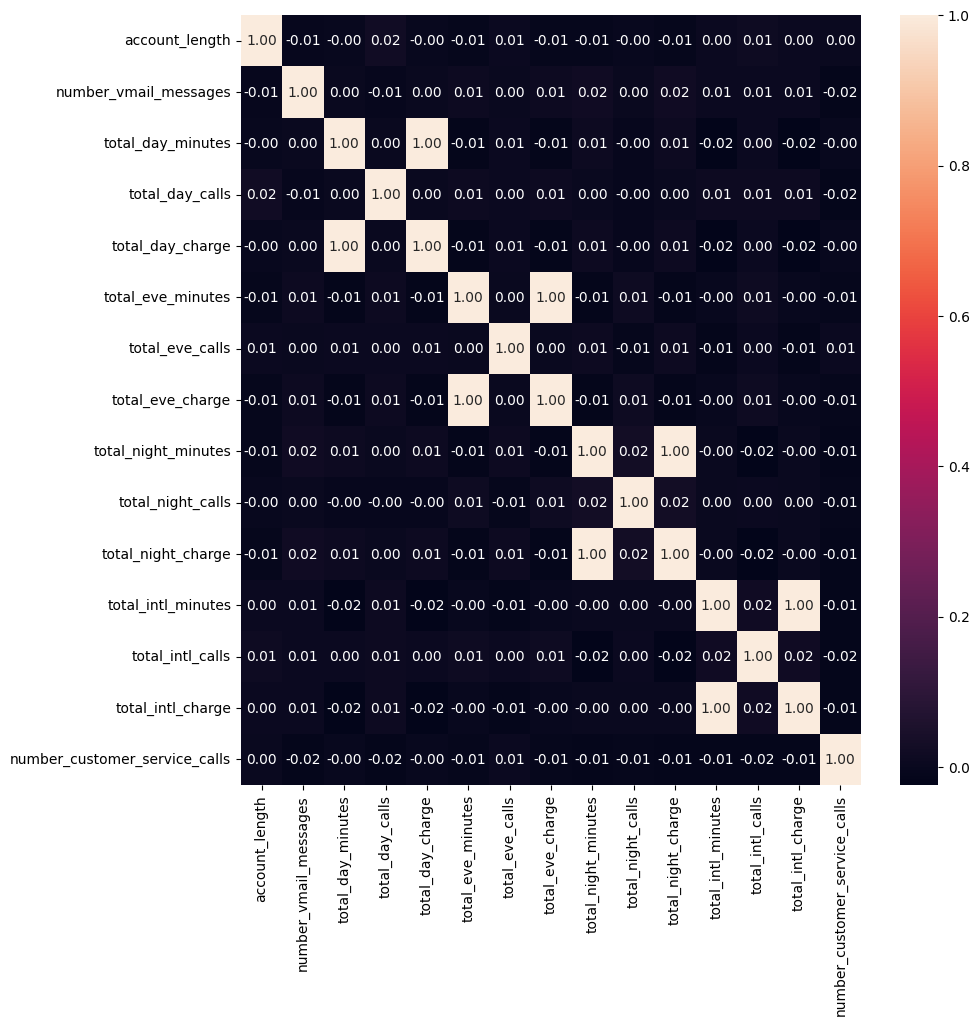

In [ ]:

def plot_correlation(data):
    # plot correlation's matrix to explore dependency between features
    # Select only numeric columns for correlation
    numeric_data = data.select_dtypes(include=['float64', 'int64'])

    # init figure size
    rcParams['figure.figsize'] = 10, 10
    fig = plt.figure()
    sns.heatmap(numeric_data.corr(), annot=True, fmt=".2f")
    plt.show()


# load your data
data = pd.read_csv('train.csv')

# plot correlation & densities
plot_correlation(data)

Accuracy: 0.91

Confusion matrix:
 [[699  23]
 [ 53  75]]

Classification report:
               precision    recall  f1-score   support

           0      0.930     0.968     0.948       722
           1      0.765     0.586     0.664       128

    accuracy                          0.911       850
   macro avg      0.847     0.777     0.806       850
weighted avg      0.905     0.911     0.906       850



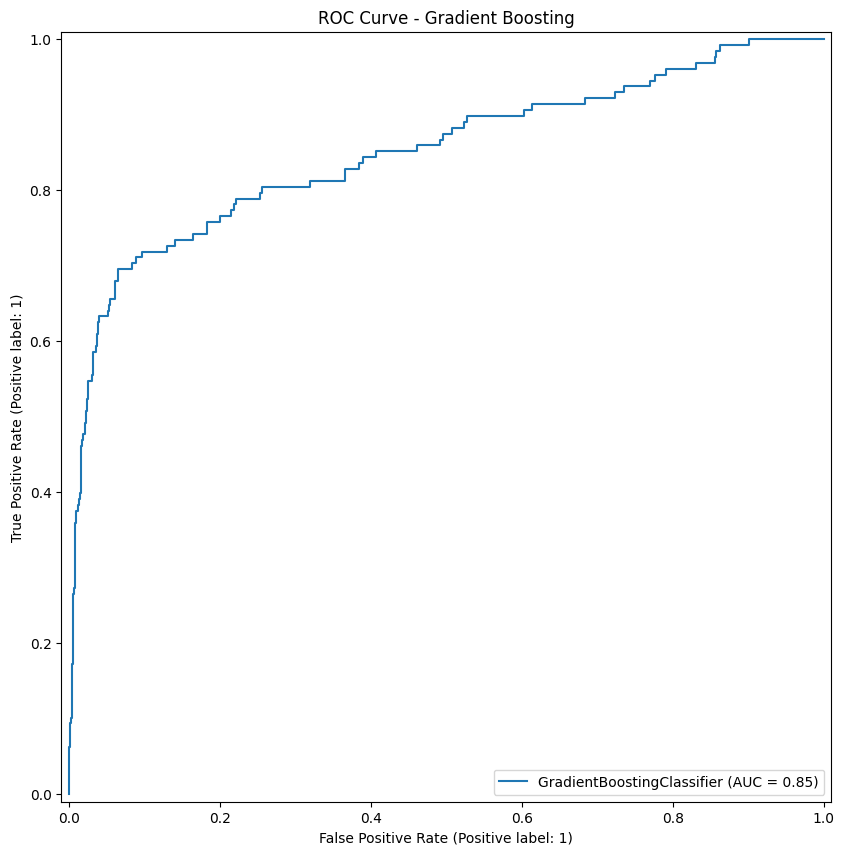

AUC: 0.85
Gradient Boosting Classifier Accuracy: 0.91


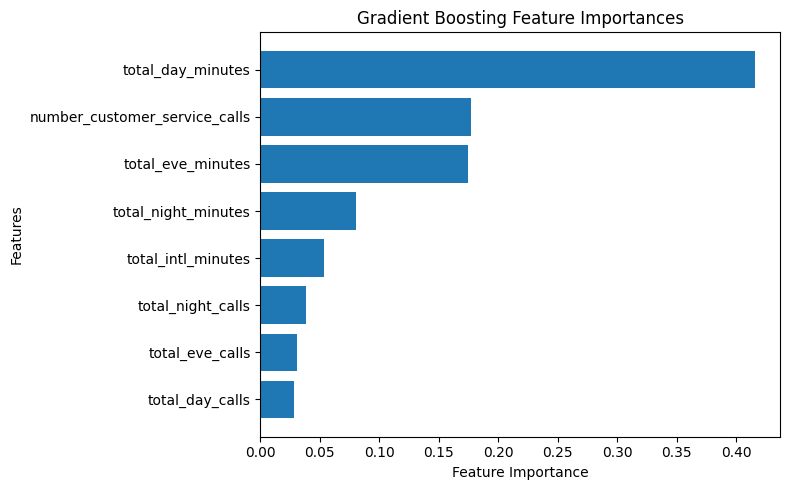

In [ ]:
# Gradient Boosting Classifier - churn-encoded

# Load data
train_df = pd.read_csv('train.csv')

# churn_encoded column syntax refactored by ChatGPT
# Encode churn as binary (robust to stray capitalization/whitespace)
train_df["churn_encoded"] = (train_df["churn"].astype(str).str.strip().str.lower().map({"no": 0, "yes": 1}))


# Select features (predictors) and target
X_features = [
    'total_day_minutes', 'total_eve_minutes', 'total_night_minutes',
    'total_intl_minutes', 'total_day_calls', 'total_eve_calls',
    'total_night_calls', 'number_customer_service_calls']
y_encoded = 'churn_encoded'


# Define the feature and target variables
X = train_df[X_features]
y = train_df[y_encoded]


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

# Create and fit the GradientBoostingClassifier model
gb_classifier = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.05, max_depth=3, random_state=40)
gb_classifier.fit(X_train, y_train)

# Make predictions
y_pred_class = gb_classifier.predict(X_test)
y_prob_class = gb_classifier.predict_proba(X_test)[:, 1]


print(f"Accuracy: {accuracy_score(y_test, y_pred_class):.2f}")
print("\nConfusion matrix:\n", confusion_matrix(y_test, y_pred_class))
print("\nClassification report:\n", classification_report(y_test, y_pred_class, digits=3))

# Plot ROC Curve
RocCurveDisplay.from_estimator(gb_classifier, X_test, y_test)
plt.title("ROC Curve - Gradient Boosting")
plt.show()

auc = roc_auc_score(y_test, y_prob_class)
print(f"AUC: {auc:.2f}")

# Evaluate the classifier model
accuracy = accuracy_score(y_test, y_pred_class)
print(f"Gradient Boosting Classifier Accuracy: {accuracy:.2f}")

importances = pd.Series(gb_classifier.feature_importances_, index=X_train.columns).sort_values()
plt.figure(figsize=(8, 5))
plt.barh(importances.index, importances.values)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Gradient Boosting Feature Importances")
plt.tight_layout()
plt.show()

In [ ]:
### Gradient Boosting Regressor using 'total_day_minutes' as target

# Load data
train_df = pd.read_csv('train.csv')

# Encode churn as binary / preprocess to lowercase
train_df["churn_encoded"] = (train_df["churn"].astype(str).str.strip().str.lower().map({"no": 0, "yes": 1}))

X_features = [
    'total_day_minutes', 'total_eve_minutes', 'total_night_minutes',
    'total_intl_minutes', 'total_day_calls', 'total_eve_calls',
    'total_night_calls', 'number_customer_service_calls']

X_reg = train_df[X_features]
y_reg = train_df['total_day_minutes']
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=20)

# Fit the GradientBoostingRegressor model
gb_reg = GradientBoostingRegressor(n_estimators=100, learning_rate=0.05, max_depth=3, random_state=20)
gb_reg.fit(X_train_reg, y_train_reg)

# Make predictions and evaluate
y_pred_reg = gb_reg.predict(X_test_reg)
mse = mean_squared_error(y_test_reg, y_pred_reg)
print(f"Gradient Boosting Regressor Mean Squared Error: {mse:.2f}")

# Get feature importances from the trained classifier
feature_importances = gb_reg.feature_importances_

# DataFrame for better visualization
importance_df = pd.DataFrame({'Feature': X_features, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)

print("Feature Importance:")
print(importance_df)

Gradient Boosting Regressor Mean Squared Error: 0.33
Feature Importance:
                         Feature  Importance
0              total_day_minutes         1.0
1              total_eve_minutes         0.0
2            total_night_minutes         0.0
3             total_intl_minutes         0.0
4                total_day_calls         0.0
5                total_eve_calls         0.0
6              total_night_calls         0.0
7  number_customer_service_calls         0.0
